In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = str(1)

In [2]:
start_iter = 2
end_iter = 4

In [3]:
import tensorflow_probability.substrates.jax as tfp
import jax
import optax
from functools import partial
import seaborn as sns
import tensorflow as tf
dist = tfp.distributions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import random
from dataloader import *
from utilities import *
from model import *
from retrain_fun import *
random.seed(0)
np.random.seed(0)
jax.random.PRNGKey(0)
os.environ["XLA_FLAGS"] = "--xla_gpu_deterministic_reductions --xla_gpu_autotune_level=2"
os.environ['TF_CUDNN_DETERMINISTIC']='1'


2023-05-08 10:18:15.998136: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
data_aggregated, houses = data_preprocess()

In [5]:
train_list= [ [2361, 7719, 9019, 2335, 7951]]
test_list= [[4373, 7901, 3456, 3538, 2818]]
pool_list=[]
for i in range(len(train_list)):
    pool = [j for j in houses if j not in train_list[i]+test_list[i]]
    pool_list.append(pool)

In [6]:
random_picks = [[8156, 661, 7800, 8386, 8565, 5746, 9278, 7536, 1642, 9160],
 [7800, 9160, 8565, 661, 1642, 9278, 8156, 7536, 5746, 8386],
 [8565, 9160, 8386, 661, 5746, 7536, 7800, 1642, 9278, 8156],
 [7800, 7536, 661, 8386, 9278, 1642, 8565, 5746, 9160, 8156],
 [7536, 7800, 8156, 9278, 661, 5746, 8386, 8565, 9160, 1642],
 [661, 8156, 9278, 7800, 8386, 7536, 9160, 1642, 5746, 8565],
 [661, 1642, 8386, 9160, 9278, 5746, 7536, 8156, 8565, 7800],
 [7800, 9278, 1642, 5746, 7536, 8156, 9160, 8565, 8386, 661],
 [5746, 661, 9160, 8156, 9278, 8565, 7536, 8386, 1642, 7800],
 [7800, 8565, 8156, 8386, 7536, 9278, 661, 1642, 5746, 9160]]


STARTING FOR all appliances, FOR ITERATIONS - 2 to 4
############################################Random iteration number#################################### : 3
I am pool houses picck [8565, 9160, 8386, 661, 5746, 7536, 7800, 1642, 9278, 8156]
-------------------------------------------Iteration No:----------------------------------------- -> 2.0
(70370, 5)


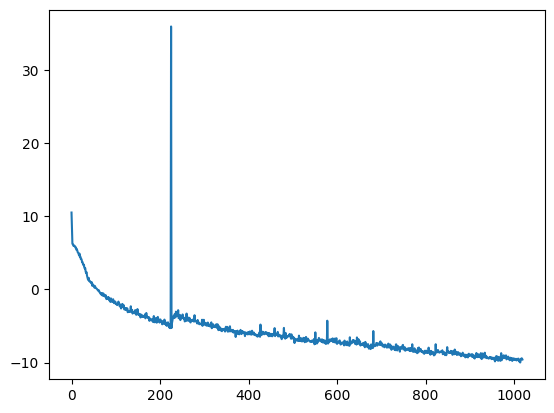

(2, 71995, 5)
RMSE : [874.1137    72.73692  234.21764   55.417847 502.5559  ] MAE  : [370.93323   43.826195 121.70309   24.835651 295.3451  ] NLL : 7867.138671875
I am random house id = 8565
I am pool houses [8565, 9160, 8386, 661, 5746, 7536, 7800, 1642, 9278, 8156]
(array([0]),)
[0]
0
-------------------------------------------Iteration No:----------------------------------------- -> 2.1


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565]


2023-05-08 10:19:27.846728: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[113214,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[113214,50,99]{2,1,0}, f32[50,50,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


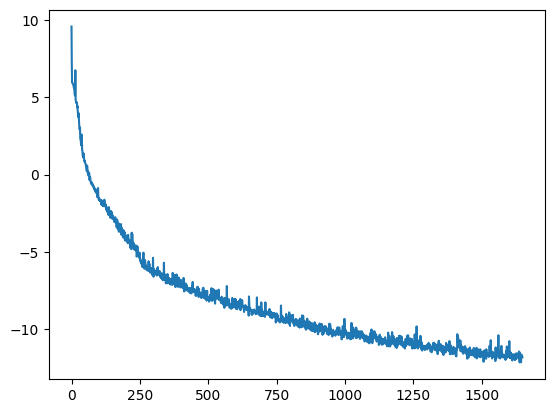

RMSE : [696.37714  70.55533 150.30713 100.83744 501.22018] MAE  : [303.6458    43.41103   91.94046   29.342613 257.98132 ] NLL : 5.108105182647705
-------------------------------------------Iteration No:----------------------------------------- -> 2.2


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160]


2023-05-08 10:19:51.165881: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[163613,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[163613,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:19:52.210028: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[163613,50,99]{2,1,0}, u8[0]{0}) custom-call(f32[163613,40,99]{2,1,0}, f32[50,40,5]{2,1,0}), window={size=5 pad=2_2}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05

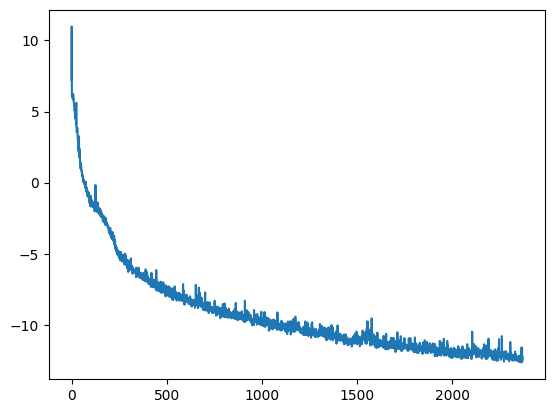

RMSE : [263.40918   63.610004 106.78672   25.136995 104.06457 ] MAE  : [97.79721  37.243828 57.32288   4.411041 29.249218] NLL : 7.885995388031006
-------------------------------------------Iteration No:----------------------------------------- -> 2.3


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386]


2023-05-08 10:20:21.440284: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[221212,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[221212,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:20:22.576841: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[221212,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[221212,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:

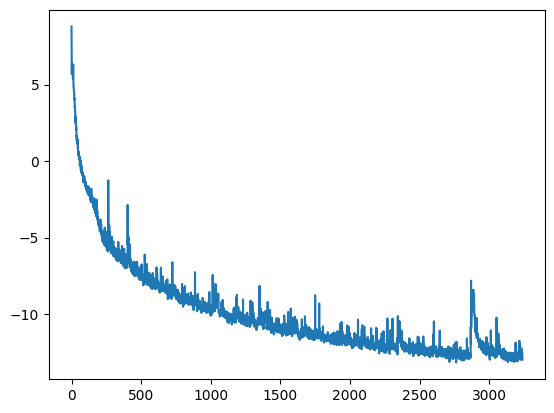

RMSE : [277.77725   60.357185  99.93196   31.503164 113.12462 ] MAE  : [94.42443  34.248505 53.79007   8.004995 22.538635] NLL : 11.802746772766113
-------------------------------------------Iteration No:----------------------------------------- -> 2.4


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661]


2023-05-08 10:21:01.695562: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[298971,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[298971,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:21:03.184877: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[298971,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[298971,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:

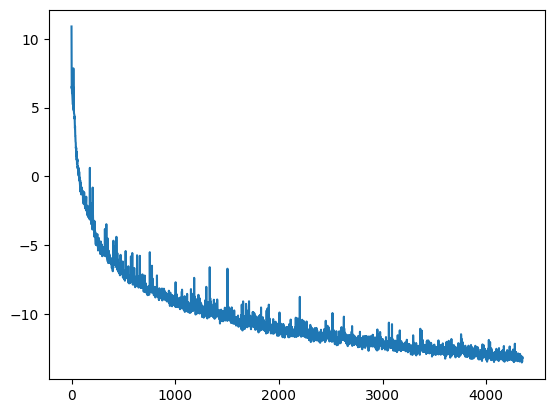

RMSE : [275.14914   59.847813  96.10096   36.252625 157.67357 ] MAE  : [84.46424  32.944527 50.313637  8.96125  29.30293 ] NLL : 7.32942008972168
-------------------------------------------Iteration No:----------------------------------------- -> 2.5


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661 5746]


2023-05-08 10:21:53.137797: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[370970,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[370970,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:21:54.966173: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[370970,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[370970,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:

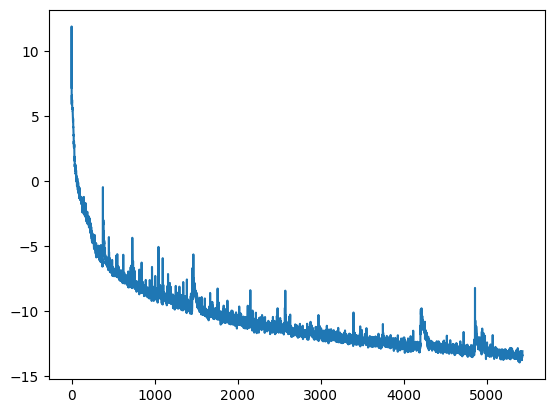

RMSE : [213.1545    59.878292  88.5738    34.968655 104.08575 ] MAE  : [65.90588  31.341927 44.80102   7.753866 17.878613] NLL : 5.712325572967529
-------------------------------------------Iteration No:----------------------------------------- -> 2.6


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661 5746 7536]


2023-05-08 10:22:54.940694: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[449329,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[449329,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:22:57.112727: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[449329,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[449329,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


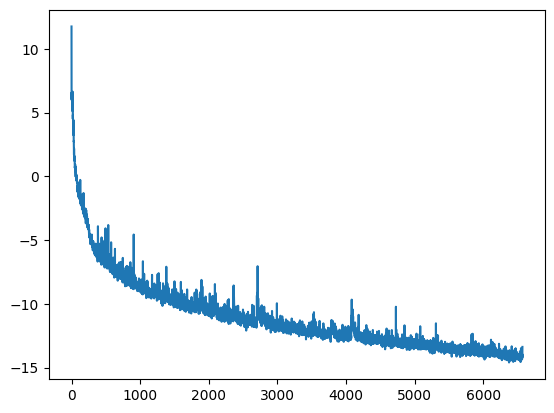

RMSE : [205.68668   59.952263  81.67059   53.069874 110.66285 ] MAE  : [67.25966  31.194923 40.460102 11.989473 19.53627 ] NLL : 6.161983966827393
-------------------------------------------Iteration No:----------------------------------------- -> 2.7


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661 5746 7536 7800]


2023-05-08 10:24:08.075000: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[535728,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[535728,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:24:10.665511: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[535728,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[535728,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


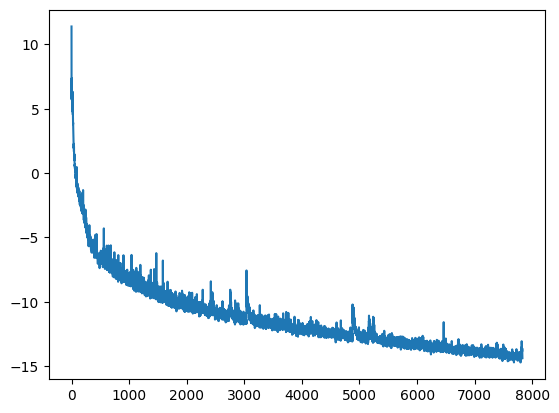

RMSE : [173.46501   58.050064  86.0123    37.642967  79.21288 ] MAE  : [58.055546 29.88938  43.056564  8.653458 13.836335] NLL : 8.309596061706543
-------------------------------------------Iteration No:----------------------------------------- -> 2.8


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661 5746 7536 7800 1642]


2023-05-08 10:25:34.382072: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[629327,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[629327,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:25:37.384613: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[629327,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[629327,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


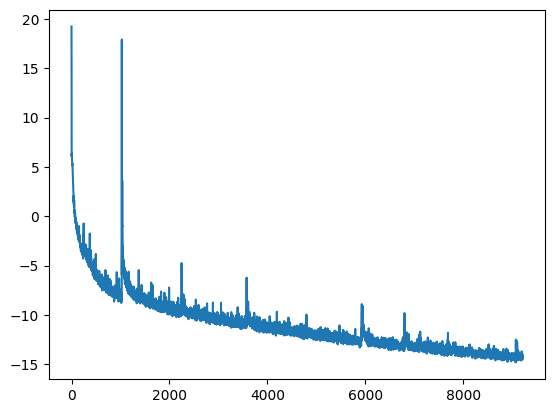

RMSE : [191.73709   60.053265  81.01448   36.3218   148.99982 ] MAE  : [54.845306 31.130516 37.357273  8.513758 28.626202] NLL : 5.039907932281494
-------------------------------------------Iteration No:----------------------------------------- -> 2.9


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 8565 9160 8386  661 5746 7536 7800 1642 9278]


2023-05-08 10:27:17.997527: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[730126,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[730126,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


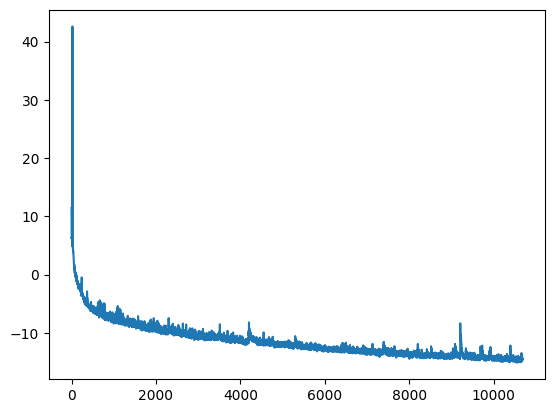

RMSE : [140.48413   58.328503  75.299126  26.931292  69.8573  ] MAE  : [47.80397   29.190723  33.913258   5.1730533 12.995192 ] NLL : 6.151249408721924
############################################Random iteration number#################################### : 4
I am pool houses picck [7800, 7536, 661, 8386, 9278, 1642, 8565, 5746, 9160, 8156]
-------------------------------------------Iteration No:----------------------------------------- -> 3.0
(70370, 5)


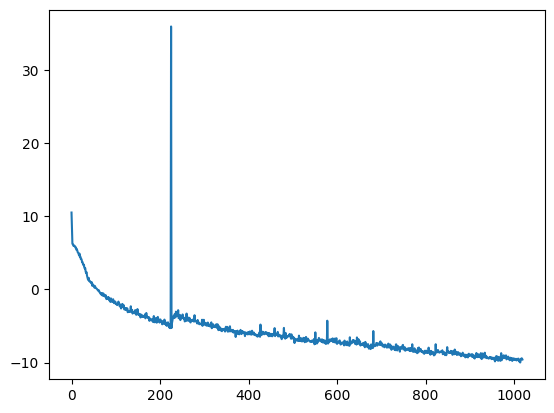

(2, 71995, 5)
RMSE : [874.1137    72.73692  234.21764   55.417847 502.5559  ] MAE  : [370.93323   43.826195 121.70309   24.835651 295.3451  ] NLL : 7867.138671875
I am random house id = 7800
I am pool houses [7800, 7536, 661, 8386, 9278, 1642, 8565, 5746, 9160, 8156]
(array([0]),)
[0]
0
-------------------------------------------Iteration No:----------------------------------------- -> 3.1


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800]


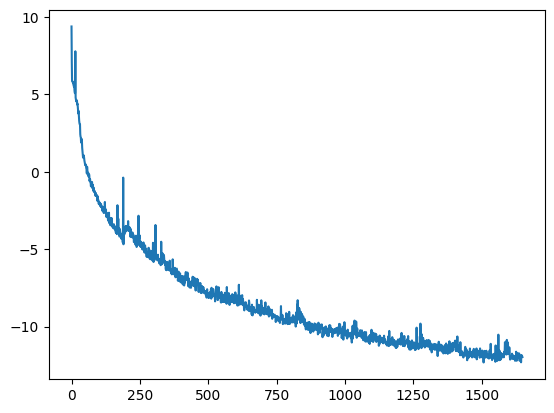

RMSE : [833.7002   71.14277 173.90204 168.84534 499.3764 ] MAE  : [350.3201    43.59827   92.71855   62.644035 281.76074 ] NLL : 5.4822163581848145
-------------------------------------------Iteration No:----------------------------------------- -> 3.2


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536]


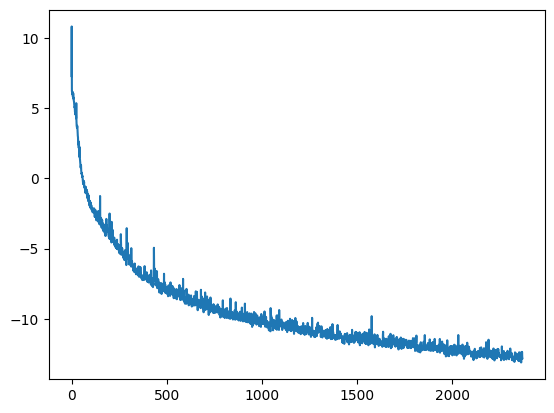

RMSE : [273.07486   65.335785 106.81389   29.650251 173.22078 ] MAE  : [100.578995   37.052612   54.43621     6.8302712  64.05302  ] NLL : 5.317579746246338
-------------------------------------------Iteration No:----------------------------------------- -> 3.3


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661]


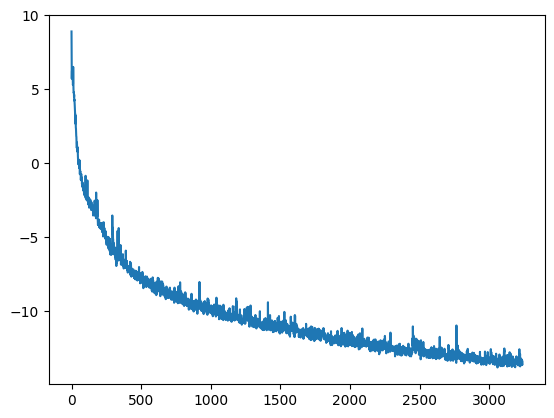

RMSE : [263.80264   61.66159  110.23835   34.845604 142.98106 ] MAE  : [96.05858  33.32676  54.992275 10.18383  37.823284] NLL : 5.976033687591553
-------------------------------------------Iteration No:----------------------------------------- -> 3.4


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386]


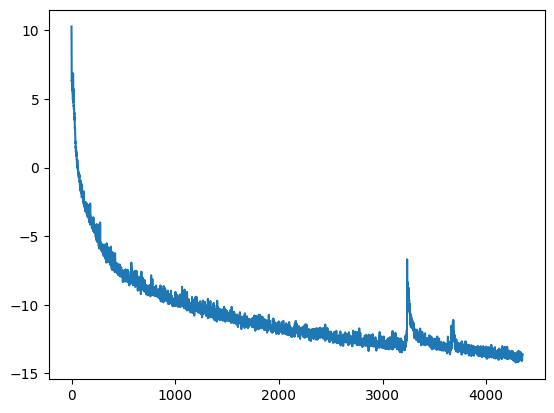

RMSE : [224.98329   59.753315  95.8514    30.181335 121.588264] MAE  : [76.53508  31.979622 47.3689    7.726113 25.794403] NLL : 10.066385269165039
-------------------------------------------Iteration No:----------------------------------------- -> 3.5


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386 9278]


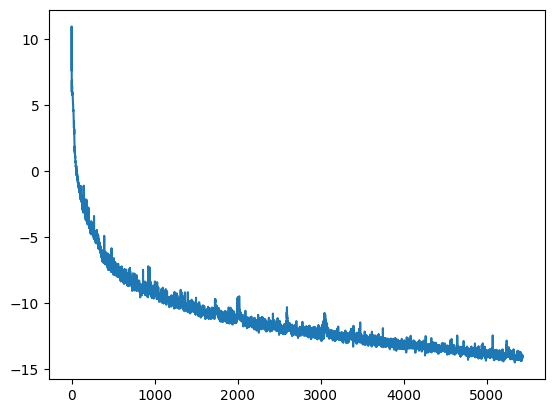

RMSE : [167.16321   57.86763   94.303474  24.64064   73.56985 ] MAE  : [62.061615  28.964788  42.608013   4.5252023 10.103554 ] NLL : 9.830462455749512
-------------------------------------------Iteration No:----------------------------------------- -> 3.6


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386 9278 1642]


2023-05-08 10:32:06.023808: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[447709,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[447709,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:32:08.193005: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[447709,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[447709,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


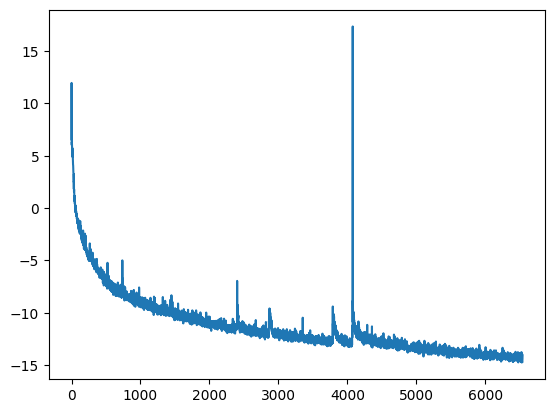

RMSE : [155.13823   57.916855  88.13566   24.182585  72.855225] MAE  : [51.599464  29.593637  38.929634   4.5340447 10.286104 ] NLL : 10.311741828918457
-------------------------------------------Iteration No:----------------------------------------- -> 3.7


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386 9278 1642 8565]


2023-05-08 10:33:18.661205: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[534093,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[534093,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:33:21.317935: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[534093,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[534093,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


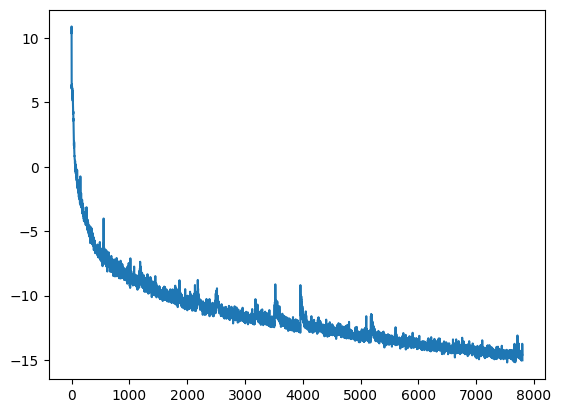

RMSE : [152.93924   56.781677  87.33272   24.642782  69.98133 ] MAE  : [51.85084   27.843954  40.646267   4.3339634  9.1691065] NLL : 11.049467086791992
-------------------------------------------Iteration No:----------------------------------------- -> 3.8


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386 9278 1642 8565 5746]


2023-05-08 10:34:44.532226: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[627692,30,99]{2,1,0}, u8[0]{0}) custom-call(f32[627692,30,106]{2,1,0}, f32[30,30,8]{2,1,0}), window={size=8}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"
2023-05-08 10:34:47.434824: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[627692,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[627692,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


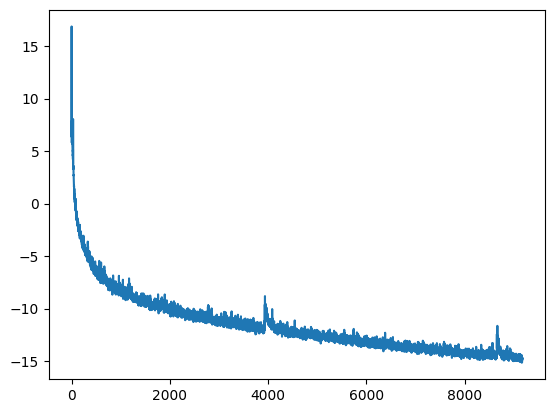

RMSE : [136.17236   56.946636  84.91118   24.046665  68.582596] MAE  : [45.1331   27.831303 40.29627   4.331453  8.987817] NLL : 9.361554145812988
-------------------------------------------Iteration No:----------------------------------------- -> 3.9


/home/dhruv.patel/final_active/multitask/retrain_fun.py:148: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train = train.append(new_df)


Train houses are
[7719 9019 2335 2361 7951 7800 7536  661 8386 9278 1642 8565 5746 9160]


2023-05-08 10:36:26.372812: W external/org_tensorflow/tensorflow/compiler/xla/service/gpu/gpu_conv_algorithm_picker.cc:825] None of the algorithms provided by cuDNN heuristics worked; trying fallback algorithms.  Conv: (f32[728491,40,99]{2,1,0}, u8[0]{0}) custom-call(f32[728491,30,104]{2,1,0}, f32[40,30,6]{2,1,0}), window={size=6}, dim_labels=bf0_oi0->bf0, custom_call_target="__cudnn$convForward", backend_config="{\"conv_result_scale\":1,\"activation_mode\":\"0\",\"side_input_scale\":0}"


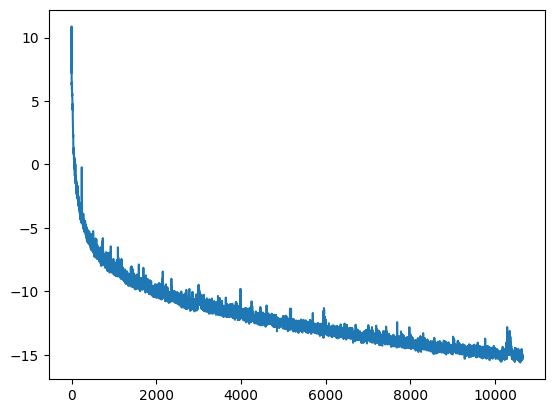

RMSE : [124.90784   56.494183  86.655235  24.9074    64.959274] MAE  : [41.370483  27.368431  39.298542   4.3812327  8.572679 ] NLL : 18.1447811126709


In [7]:
total_rmse=[]
houseids=[]

all_rmses = dict()
all_maes = dict() 
all_preds = dict() 

# batch_size = batch_size_dict[appliance_name]
# learning_rate = learning_rate_dict[appliance_name]

iteration_number = f'{start_iter}_{end_iter}_iterations'

print(f"STARTING FOR all appliances, FOR ITERATIONS - {start_iter} to {end_iter}")

for i in range(start_iter,end_iter): #total 10 iterations

    print(f"############################################Random iteration number#################################### : {i+1}")

    train_houses = train_list[0]
    test_houses = test_list[0]
    pool_houses = random_picks[i]

    print(f"I am pool houses picck {pool_houses}")
    
    
    train = data_aggregated[data_aggregated["dataid"].isin(train_houses)] 
    test = data_aggregated[data_aggregated["dataid"].isin(test_houses)]

    all_rmses[i] = []
    all_maes[i] = []
    all_preds[i] = []
    
    houses=[]
    start= ["2018-03-01 00:00:00-06","2018-03-11 00:00:00-06","2018-03-16 00:00:00-06","2018-03-21 00:00:00-06","2018-03-26 00:00:00-06","2018-04-01 00:00:00-06", "2018-04-06 00:00:00-06", "2018-04-11 00:00:00-06", "2018-04-16 00:00:00-06", "2018-04-21 00:00:00-06"]
    end=   ["2018-03-10 23:59:00-06","2018-03-15 23:59:00-06","2018-03-20 23:59:00-06","2018-03-25 23:59:00-06","2018-03-31 23:59:00-06","2018-04-05 23:59:00-06", "2018-04-10 23:59:00-06", "2018-04-15 23:59:00-06", "2018-04-20 23:59:00-06", "2018-04-25 23:59:00-06"]
    for j in range(len(start)):
        
        
        print(f"-------------------------------------------Iteration No:----------------------------------------- -> {i}.{j}")

        if(j==0):
            rmsee, maes, train, test,current_pred = retrain_random(0, start[j], end[j], train, test, data_aggregated)
            all_rmses[i].append(rmsee)
            all_maes[i].append(maes)
            all_preds[i].append(current_pred)

            random_house_id = random_picks[i][j]
            print(f"I am random house id = {random_house_id}")
            print(f"I am pool houses {pool_houses}")
            print(f"{np.where(np.array(pool_houses)==random_house_id)}")
            print(f"{np.where(np.array(pool_houses)==random_house_id)[0]}")
            print(f"{np.where(np.array(pool_houses)==random_house_id)[0][0]}")
            random_house_index = np.where(np.array(pool_houses)==random_house_id)[0][0]  

            houses.append(random_house_id)
            pool_houses= np.delete(pool_houses, random_house_index)
            # break #REMOVE AT THE END

        elif(j==10):
            rmsee, maes, train, test,current_pred = retrain_random(random_house_id, start[j], end[j],train, test, data_aggregated)
            all_rmses[i].append(rmsee)
            all_maes[i].append(maes)
            all_preds[i].append(current_pred)

        else:
            rmsee, maes, train, test,current_pred = retrain_random(random_house_id, start[j], end[j],train, test, data_aggregated)
            all_rmses[i].append(rmsee)
            all_maes[i].append(maes)
            all_preds[i].append(current_pred)

            random_house_id = random_picks[i][j]
            
            random_house_index = np.where(np.array(pool_houses)==random_house_id)[0][0]  
            
            houses.append(random_house_id)
            pool_houses= np.delete(pool_houses, random_house_index)
        
        
    
    houseids.append(houses)





In [29]:
appliances = ['air', 'refrigerator', 'furnace', 'clotheswasher', 'dishwasher']
for i in range(5):
    for iteration_number in range(start_iter, end_iter):
        name_of_file_rmses = "random"+"_"+str(iteration_number) + "RMSES"+".csv"
        name_of_file_maes = "random"+"_"+str(iteration_number) + "MAES"+".csv"
        # name_of_file_preds = str(random)+"_"+str(iteration_number)+"PREDS"+".csv"

        if not os.path.exists(f'{appliances[i]}'):
            os.mkdir(f'{appliances[i]}')

        # Save the DataFrame to a CSV file
        pd.DataFrame(all_rmses[iteration_number])[i].to_csv(os.path.join(f'{appliances[i]}', f'{name_of_file_rmses}'), index=False)
        pd.DataFrame(all_maes[iteration_number])[i].to_csv(os.path.join(f'{appliances[i]}', f'{name_of_file_maes}'), index=False)
# pd.DataFrame(all_preds).to_csv(os.path.join(f'{appliance}', f'{name_of_file_preds}'), index=False)